Iteration 10 : Loss 5730.1026
Iteration 20 : Loss 5440.9022
Iteration 30 : Loss 5188.6138
Iteration 40 : Loss 4967.9982
Iteration 50 : Loss 4774.5911
Iteration 60 : Loss 4604.5865
Iteration 70 : Loss 4454.7386
Iteration 80 : Loss 4322.2769
Iteration 90 : Loss 4204.8363
Iteration 100 : Loss 4100.3955
Iteration 110 : Loss 4007.2263
Iteration 120 : Loss 3923.8497
Iteration 130 : Loss 3848.9990
Iteration 140 : Loss 3781.5881
Iteration 150 : Loss 3720.6848
Iteration 160 : Loss 3665.4882
Iteration 170 : Loss 3615.3091
Iteration 180 : Loss 3569.5540
Iteration 190 : Loss 3527.7105
Iteration 200 : Loss 3489.3359
Iteration 210 : Loss 3454.0470
Iteration 220 : Loss 3421.5113
Iteration 230 : Loss 3391.4400
Iteration 240 : Loss 3363.5814
Iteration 250 : Loss 3337.7158
Iteration 260 : Loss 3313.6511
Iteration 270 : Loss 3291.2187
Iteration 280 : Loss 3270.2701
Iteration 290 : Loss 3250.6747
Iteration 300 : Loss 3232.3167
Iteration 310 : Loss 3215.0934
Iteration 320 : Loss 3198.9136
Iteration 330 : L

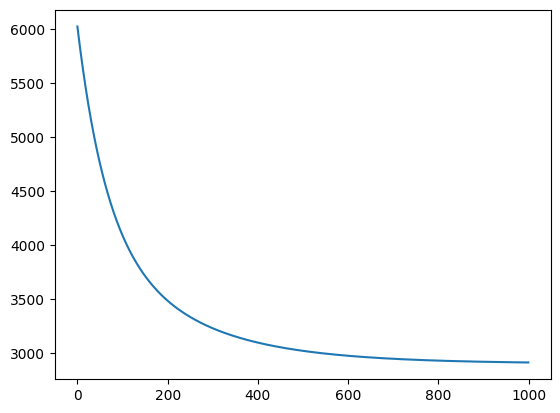

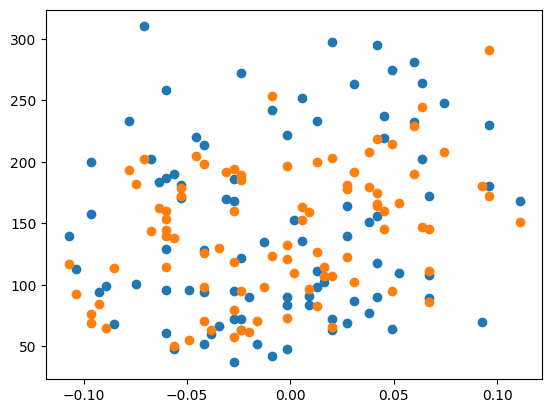

In [114]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# (1) 데이터 가져오기
diabetes = load_diabetes()

df_X = diabetes.data
df_y = diabetes.target

# loss 값 낮추기 위한 features 조정
selected_features = [0, 1, 2, 3, 4, 5, 6, 7, 8]
df_X = diabetes.data[:, selected_features]


# (2) 모델에 입력할 데이터 X 준비하기
df_X = np.array(df_X)



# (3) 모델에 예측할 데이터 y 준비하기
df_y = np.array(df_y)



# (4) train 데이터와 test 데이터로 분리하기
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)



# (5) 모델 준비하기
x_len = len(selected_features)

W = np.random.rand(x_len)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(x_len):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions



# (6) 손실함수 loss 정의하기
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # MSE : 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L



# (7) 기울기를 구하는 gradient 함수 구현하기

def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)

    # y_pred 준비
    y_pred = model(X, W, b)

    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)

    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db



# (8) 하이퍼 파라미터인 학습률 설정하기
LEARNING_RATE = 0.5



#(9) 모델 학습하기
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
       print('Iteration %d : Loss %0.4f' % (i, L))


plt.plot(losses)
plt.show()


# (10) test 데이터에 대한 성능 확인하기

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse



#(11) 정답 데이터와 예측한 데이터 시각화하기

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

# dW, db = gradient(X, W, b, y)
#print(predictions)